In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from robot import *
% matplotlib inline

plt.rcParams['figure.figsize'] = (16, 6)

In [2]:
sample_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10]

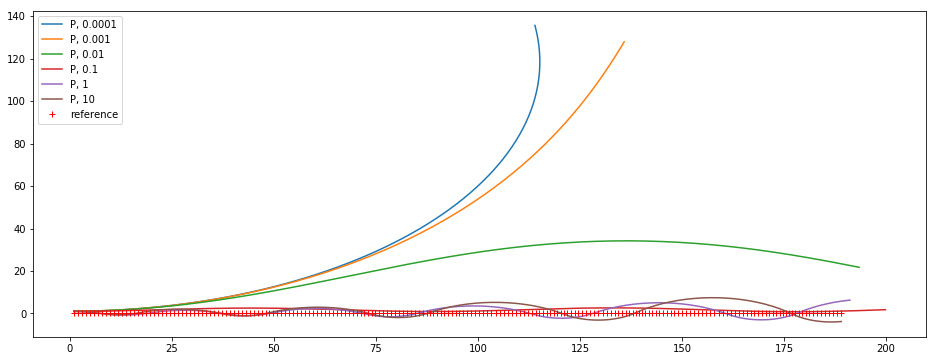

In [3]:
x_trajectory = []
y_trajectory = []
for p_val in sample_vals:
    x_trajectory, y_trajectory, err = run(make_robot(), [p_val, 0, 0])
    plt.plot(x_trajectory, y_trajectory, label='P, %s' % p_val)

n = len(x_trajectory)
plt.plot(x_trajectory, np.zeros(n), 'r+', label='reference')
plt.legend(loc='upper left')
plt.show()


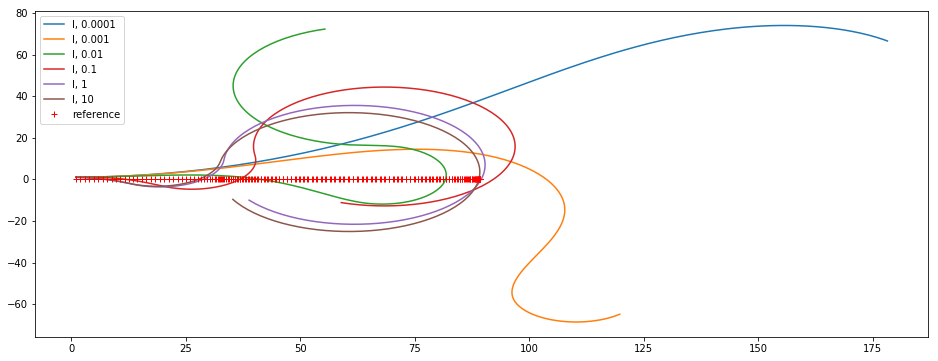

In [4]:
x_trajectory = []
y_trajectory = []
for i_val in sample_vals:
    x_trajectory, y_trajectory, err = run(make_robot(), [0, i_val, 0])
    plt.plot(x_trajectory, y_trajectory, label='I, %s' % i_val)

n = len(x_trajectory)
plt.plot(x_trajectory, np.zeros(n), 'r+', label='reference')
plt.legend(loc='upper left')
plt.show()


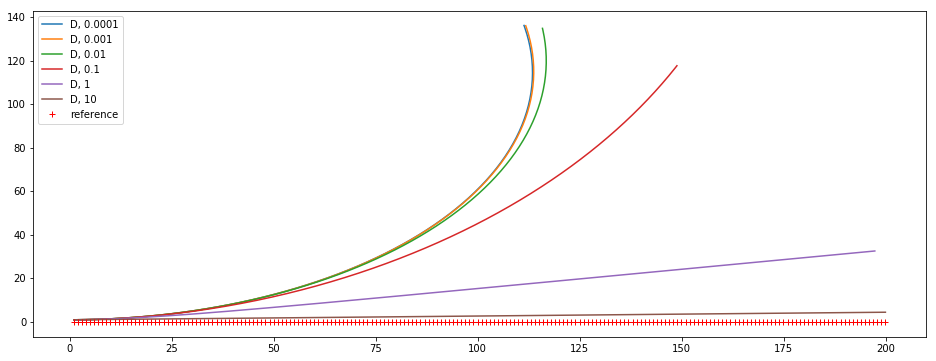

In [5]:
x_trajectory = []
y_trajectory = []
for d_val in sample_vals:
    x_trajectory, y_trajectory, err = run(make_robot(), [0, 0, d_val])
    plt.plot(x_trajectory, y_trajectory, label='D, %s' % d_val)

n = len(x_trajectory)
plt.plot(x_trajectory, np.zeros(n), 'r+', label='reference')
plt.legend(loc='upper left')
plt.show()


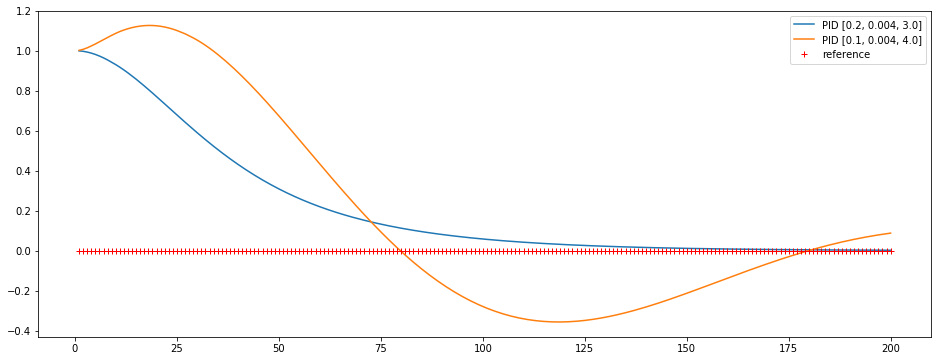

In [6]:
experiments = [[0.2, 0.004, 3.0], [0.1, 0.004, 4.0]]

x_trajectory = []
y_trajectory = []
for exper in experiments:
    x_trajectory, y_trajectory, err = run(make_robot(), exper)
    plt.plot(x_trajectory, y_trajectory, label='PID %s' % exper)

n = len(x_trajectory)
plt.plot(x_trajectory, np.zeros(n), 'r+', label='reference')
plt.legend(loc='upper right')
plt.show()
